# Case Study: Parkinson's Disease
## Technical Aspect: Ensemble Technique

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.


Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.


The data consists of those diagnosed with Parkinson Disease and those who do not.


Steps to be followed:


1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data.
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab.
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from subprocess import call
from IPython.display import Image

In [2]:
df = pd.read_csv("parkinsons.data", )

In [3]:
df.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

# [Section-A] Exploratory Data Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
df.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [7]:
status_0 = df[df['status'] == 0 ]
status_0.shape

(48, 24)

In [8]:
status_0.skew()

MDVP:Fo(Hz)        -0.206080
MDVP:Fhi(Hz)        2.191357
MDVP:Flo(Hz)        0.454401
MDVP:Jitter(%)      2.595196
MDVP:Jitter(Abs)    1.203508
MDVP:RAP            2.227438
MDVP:PPQ            1.898408
Jitter:DDP          2.227230
MDVP:Shimmer        1.632775
MDVP:Shimmer(dB)    1.744643
Shimmer:APQ3        1.495943
Shimmer:APQ5        2.005412
MDVP:APQ            1.043889
Shimmer:DDA         1.495657
NHR                 3.702145
HNR                 0.363758
status              0.000000
RPDE                0.311439
DFA                 0.278665
spread1             0.414532
spread2            -0.253889
D2                  0.007316
PPE                 0.826011
dtype: float64

In [9]:
status_1 = df[df['status'] == 1 ]
status_1.shape

(147, 24)

In [10]:
status_0.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),48.0,181.937771,52.731067,110.739000,120.947500,198.996000,229.077000,260.105000
MDVP:Fhi(Hz),48.0,223.636750,96.727067,113.597000,139.413250,231.161500,251.239250,592.030000
MDVP:Flo(Hz),48.0,145.207292,58.757070,74.287000,98.243750,113.938500,199.183000,239.170000
MDVP:Jitter(%),48.0,0.003866,0.002055,0.001780,0.002655,0.003355,0.004530,0.013600
MDVP:Jitter(Abs),48.0,0.000023,0.000015,0.000007,0.000010,0.000025,0.000030,0.000080
MDVP:RAP,48.0,0.001925,0.001066,0.000920,0.001332,0.001625,0.001907,0.006240
MDVP:PPQ,48.0,0.002056,0.000943,0.001060,0.001480,0.001775,0.002228,0.005640
Jitter:DDP,48.0,0.005776,0.003199,0.002760,0.003998,0.004875,0.005725,0.018730
MDVP:Shimmer,48.0,0.017615,0.005544,0.009540,0.014475,0.016705,0.020210,0.040870
MDVP:Shimmer(dB),48.0,0.162958,0.057822,0.085000,0.129000,0.154000,0.189250,0.405000


In [11]:
status_1.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),147.0,145.180762,32.348050,88.333000,117.572000,145.174000,170.071000,223.361000
MDVP:Fhi(Hz),147.0,188.441463,88.339180,102.145000,133.776500,163.335000,207.160500,588.518000
MDVP:Flo(Hz),147.0,106.893558,32.274358,65.476000,80.875500,99.770000,129.240000,199.020000
MDVP:Jitter(%),147.0,0.006989,0.005240,0.001680,0.004005,0.005440,0.007670,0.033160
MDVP:Jitter(Abs),147.0,0.000051,0.000037,0.000010,0.000030,0.000040,0.000060,0.000260
MDVP:RAP,147.0,0.003757,0.003241,0.000680,0.002030,0.002840,0.004100,0.021440
MDVP:PPQ,147.0,0.003900,0.002998,0.000920,0.002190,0.003140,0.004360,0.019580
Jitter:DDP,147.0,0.011273,0.009724,0.002040,0.006085,0.008530,0.012300,0.064330
MDVP:Shimmer,147.0,0.033658,0.019970,0.010220,0.018295,0.028380,0.042525,0.119080
MDVP:Shimmer(dB),147.0,0.321204,0.207798,0.090000,0.168000,0.263000,0.394500,1.302000


In [12]:
status_1['MDVP:Flo(Hz)'].mean()

106.89355782312921

In [13]:
less = (status_1['MDVP:Flo(Hz)'] < status_1['MDVP:Flo(Hz)'].mean())
status_1[less].shape

(88, 24)

In [14]:
more = (status_1['MDVP:Flo(Hz)'] > status_1['MDVP:Flo(Hz)'].mean())
status_1[more].shape

(59, 24)

#### MDVP:Fo(Hz)

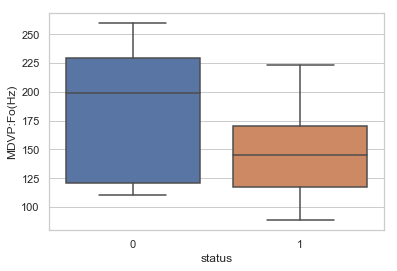

In [15]:
sns.set(style="whitegrid")
sns.boxplot('status','MDVP:Fo(Hz)', data=df)

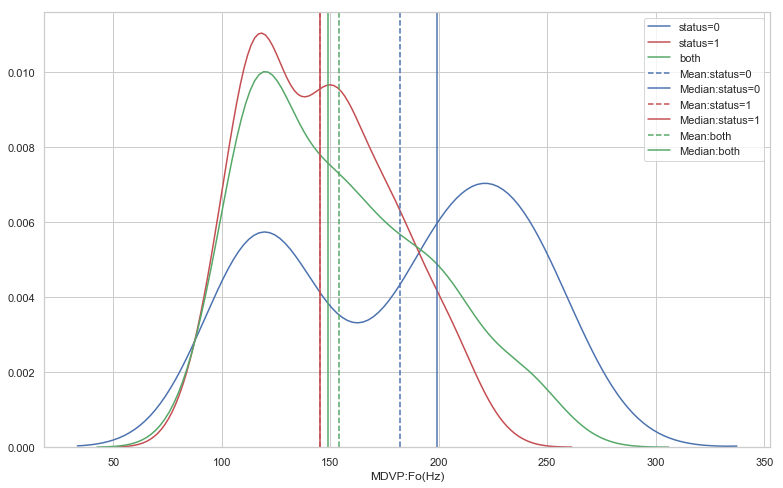

In [16]:
plt.figure(figsize=(13,8))
ax=sns.distplot( status_0['MDVP:Fo(Hz)'], hist=False , label='status=0' , color='b')
ax=sns.distplot( status_1['MDVP:Fo(Hz)'], hist=False, label='status=1', color='r')
ax=sns.distplot( df['MDVP:Fo(Hz)'], hist=False , label='both' ,color='g')
ax.axvline(status_0['MDVP:Fo(Hz)'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['MDVP:Fo(Hz)'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['MDVP:Fo(Hz)'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['MDVP:Fo(Hz)'].median(), color='r', linestyle='-', label='Median:status=1')
ax.axvline(df['MDVP:Fo(Hz)'].mean(), color='g', linestyle='--', label='Mean:both')
ax.axvline(df['MDVP:Fo(Hz)'].median(), color='g', linestyle='-', label='Median:both')

plt.legend(loc="upper right")

In [17]:
status_0['MDVP:Fo(Hz)'].skew(), status_1['MDVP:Fo(Hz)'].skew(), df['MDVP:Fo(Hz)'].skew() 

(-0.2060804755435577, 0.36684955948316283, 0.5917374636540784)

In [18]:
status_0['MDVP:Fo(Hz)'].kurtosis(), status_1['MDVP:Fo(Hz)'].kurtosis(), df['MDVP:Fo(Hz)'].kurtosis()

(-1.6481907157014024, -0.7956530227883039, -0.6278981066788805)

##### Observations on Average Vocal Fundamental Frequency (Fo) - 

* mean for the sample dataset is greater than median; hence, the distribution is right tailed, with positively skewed. 
* We can observe that distribution for people with PD; is also right-tailed, though, relatively less skewed.
* However, distribution for people without PD is negatively skewed.

* We also observe that there is a lesser variability for people with PD than that of people without PD.

#### MDVP:Fhi(Hz)

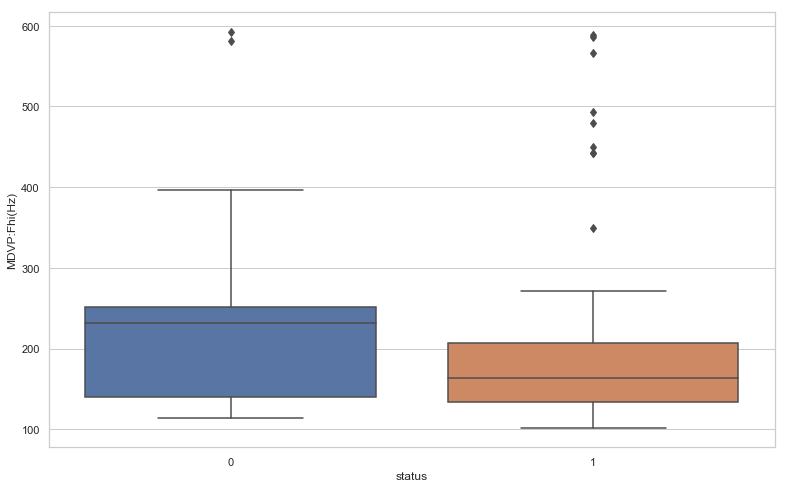

In [19]:
plt.figure(figsize=(13,8))
sns.boxplot('status','MDVP:Fhi(Hz)', data=df, fliersize=6 )

###### Analysis of outliers - using IQR and Z-score

In [20]:
Q1 = status_1['MDVP:Fhi(Hz)'].quantile(0.25)
Q3 = status_1['MDVP:Fhi(Hz)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upper = (Q3 + 1.5 * IQR)
lower =  (Q1 - 1.5 * IQR)
status_1[(status_1['MDVP:Fhi(Hz)'] < lower) | (status_1['MDVP:Fhi(Hz)'] > upper)]

73.38400000000001


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
16,phon_R01_S04_5,144.188,349.259,82.764,0.00544,0.00004,0.00211,0.00292,0.00632,0.02047,...,0.02908,0.01859,22.333,1,0.567380,0.644692,-5.440040,0.239764,2.264501,0.218164
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,...,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
116,phon_R01_S27_2,158.219,442.557,71.948,0.00476,0.00003,0.00214,0.00207,0.00642,0.01458,...,0.01818,0.01554,26.356,1,0.450798,0.653823,-6.051233,0.273280,2.640798,0.170106
117,phon_R01_S27_3,170.756,450.247,79.032,0.00555,0.00003,0.00244,0.00261,0.00731,0.01725,...,0.02270,0.01802,25.690,1,0.486738,0.676023,-4.597834,0.372114,2.975889,0.282780
118,phon_R01_S27_4,178.285,442.824,82.063,0.00462,0.00003,0.00157,0.00194,0.00472,0.01279,...,0.01851,0.00856,25.020,1,0.470422,0.655239,-4.913137,0.393056,2.816781,0.251972
120,phon_R01_S27_6,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,...,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


In [21]:
z = np.abs(stats.zscore(status_1['MDVP:Fhi(Hz)']))
status_1[z > 3]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
73,phon_R01_S19_2,112.014,588.518,107.024,0.00533,0.00005,0.00268,0.00329,0.00805,0.02448,...,0.04120,0.00623,24.178,1,0.509127,0.789532,-5.389129,0.306636,1.928708,0.225461
102,phon_R01_S24_6,139.224,586.567,66.157,0.03011,0.00022,0.01854,0.01628,0.05563,0.09419,...,0.16654,0.25930,10.489,1,0.596362,0.641418,-3.269487,0.270641,2.690917,0.444774
115,phon_R01_S27_1,151.872,492.892,69.085,0.00856,0.00006,0.00404,0.00385,0.01211,0.01843,...,0.02389,0.06051,23.693,1,0.407701,0.662668,-4.673241,0.261549,2.702355,0.274407
120,phon_R01_S27_6,128.940,479.697,88.251,0.00581,0.00005,0.00241,0.00314,0.00723,0.02008,...,0.02548,0.02350,24.743,1,0.487756,0.684130,-6.186128,0.279933,2.686240,0.152428
149,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.910213,0.270173


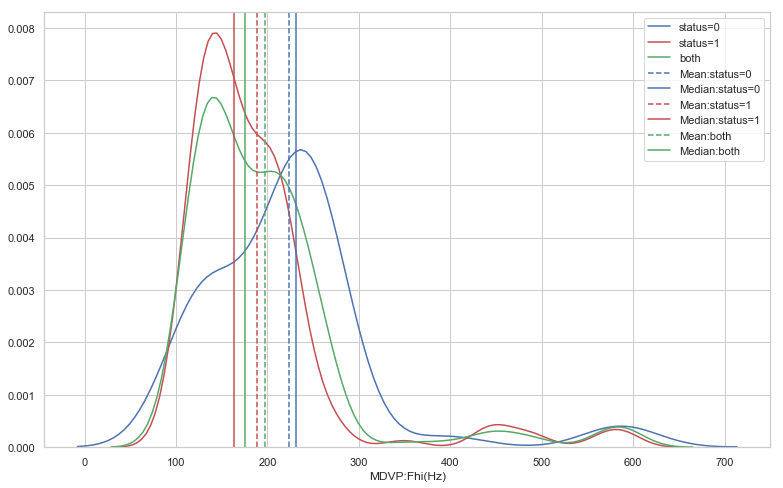

In [22]:
plt.figure(figsize=(13,8))
ax=sns.distplot( status_0['MDVP:Fhi(Hz)'], hist=False , label='status=0' , color='b')
ax=sns.distplot( status_1['MDVP:Fhi(Hz)'], hist=False, label='status=1', color='r')
ax=sns.distplot( df['MDVP:Fhi(Hz)'], hist=False , label='both' ,color='g')
ax.axvline(status_0['MDVP:Fhi(Hz)'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['MDVP:Fhi(Hz)'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['MDVP:Fhi(Hz)'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['MDVP:Fhi(Hz)'].median(), color='r', linestyle='-', label='Median:status=1')
ax.axvline(df['MDVP:Fhi(Hz)'].mean(), color='g', linestyle='--', label='Mean:both')
ax.axvline(df['MDVP:Fhi(Hz)'].median(), color='g', linestyle='-', label='Median:both')

plt.legend(loc="upper right")

In [23]:
status_0['MDVP:Fhi(Hz)'].skew(), status_1['MDVP:Fhi(Hz)'].skew(), df['MDVP:Fhi(Hz)'].skew()

(2.1913567763615234, 2.8032726878545318, 2.542145997588398)

In [24]:
status_0['MDVP:Fhi(Hz)'].kurtosis(), status_1['MDVP:Fhi(Hz)'].kurtosis(), df['MDVP:Fhi(Hz)'].kurtosis()

(6.983751803630555, 8.839929259869601, 7.627241211631889)

##### Observations on Maximum Vocal Fundamental Frequency (Fhi) - 

* mean for the dataset is greater than median; hence, the distribution is right tailed or +ve skewed. 
* We can observe that distribution for people with PD; is also right tailed or +ve skewed. Infact, more +ve skewed than complete dataset.
* Distribution for people without PD is also +ve skewed.

* Kurtosis for people with PD is higher than People without PD

* We also observe that there is a lesser variability for people with PD than that of people without PD; however, there are larger number of outliers for people with PD compared to people without PD.

#### MDVP:Flo(Hz)

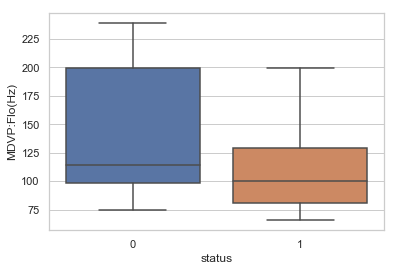

In [25]:
sns.boxplot('status','MDVP:Flo(Hz)', data=df)

In [26]:
status_0['MDVP:Flo(Hz)'].skew(), status_1['MDVP:Flo(Hz)'].skew(), df['MDVP:Flo(Hz)'].skew()

(0.45440071659018355, 0.8936644548189732, 1.217350448627808)

In [27]:
status_0['MDVP:Flo(Hz)'].kurtosis(), status_1['MDVP:Flo(Hz)'].kurtosis(), df['MDVP:Flo(Hz)'].kurtosis()

(-1.5684019767347284, -0.11332150570209354, 0.6546145211395396)

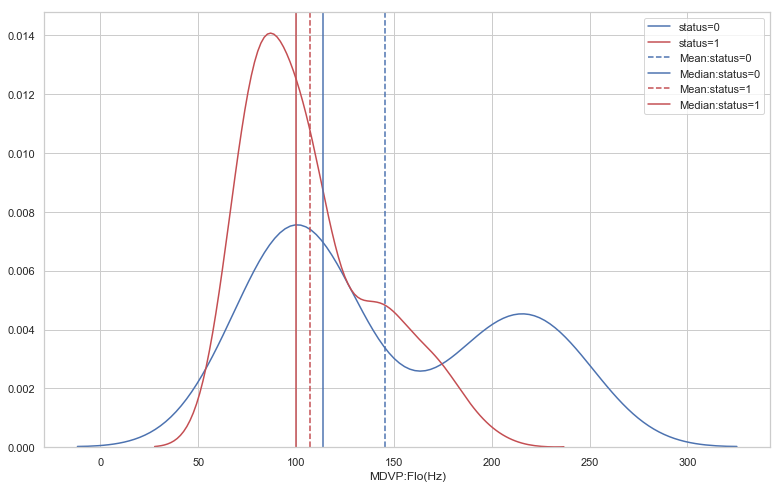

In [28]:
plt.figure(figsize=(13,8))
ax = sns.distplot( status_0['MDVP:Flo(Hz)'], hist=False , label='status=0', color='b')
ax  = sns.distplot( status_1['MDVP:Flo(Hz)'], hist=False, label='status=1', color='r')
#ax = sns.distplot( df['MDVP:Flo(Hz)'], hist=False , label='both')
ax.axvline(status_0['MDVP:Flo(Hz)'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['MDVP:Flo(Hz)'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['MDVP:Flo(Hz)'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['MDVP:Flo(Hz)'].median(), color='r', linestyle='-', label='Median:status=1')
plt.legend(loc="upper right")

#### MDVP:Jitter(%)

Domain notes:

* Jitter and shimmer are the two common perturbation measures in acoustic analysis.
* Jitter is a measure of frequency instability, while shimmer is a measure of amplitude instability.
* __A normal voice has a small amount of instability during sustained vowel production.__

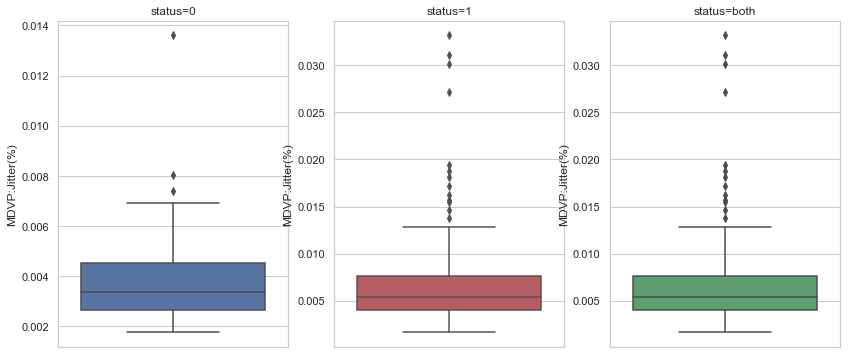

In [29]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14,6))
sns.boxplot('MDVP:Jitter(%)', data=status_0, ax=ax0, orient="v", color='b')
sns.boxplot('MDVP:Jitter(%)', data=status_1, ax=ax1, orient="v", color='r')
sns.boxplot('MDVP:Jitter(%)', data=status_1, ax=ax2, orient="v", color='g')
ax0.set_title('status=0')
ax1.set_title('status=1')
ax2.set_title('status=both')
plt.show()

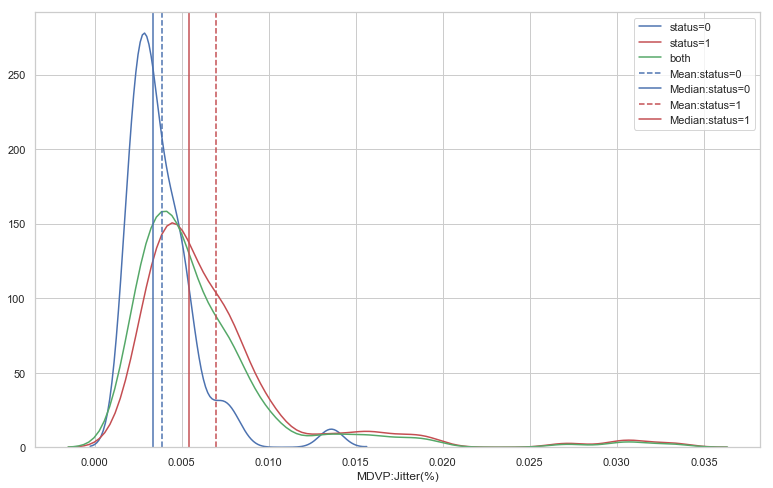

In [30]:
plt.figure(figsize=(13,8))
ax=sns.distplot( status_0['MDVP:Jitter(%)'], hist=False, color='b', label='status=0')
ax=sns.distplot( status_1['MDVP:Jitter(%)'], hist=False, color='r', label='status=1')
ax=sns.distplot( df['MDVP:Jitter(%)'], hist=False, color='g', label='both')
ax.axvline(status_0['MDVP:Jitter(%)'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['MDVP:Jitter(%)'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['MDVP:Jitter(%)'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['MDVP:Jitter(%)'].median(), color='r', linestyle='-', label='Median:status=1')
plt.legend(loc='upper right')
plt.show()

In [31]:
status_0['MDVP:Jitter(%)'].skew(), status_1['MDVP:Jitter(%)'].skew(), df['MDVP:Jitter(%)'].skew()

(2.59519606641597, 2.8574858039979762, 3.0849462014441817)

In [32]:
status_0['MDVP:Jitter(%)'].kurtosis(), status_1['MDVP:Jitter(%)'].kurtosis(), df['MDVP:Jitter(%)'].kurtosis()

(9.942782358628424, 9.834618549446867, 12.030939276179508)

##### Observations on MDVP jitter in percentage -
* People with PD have high Jitter Percentage than people without PD
* People with PD have many outliers, indicating that Jitter Percentage can be excessively high among PD patients.

#### MDVP:Jitter(Abs)

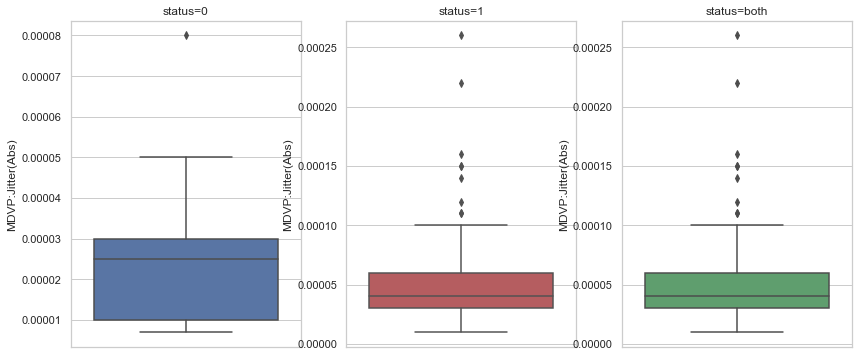

In [33]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14,6))
sns.boxplot('MDVP:Jitter(Abs)', data=status_0, ax=ax0, orient="v", color='b')
sns.boxplot('MDVP:Jitter(Abs)', data=status_1, ax=ax1, orient="v", color='r')
sns.boxplot('MDVP:Jitter(Abs)', data=status_1, ax=ax2, orient="v", color='g')
ax0.set_title('status=0')
ax1.set_title('status=1')
ax2.set_title('status=both')
plt.show()

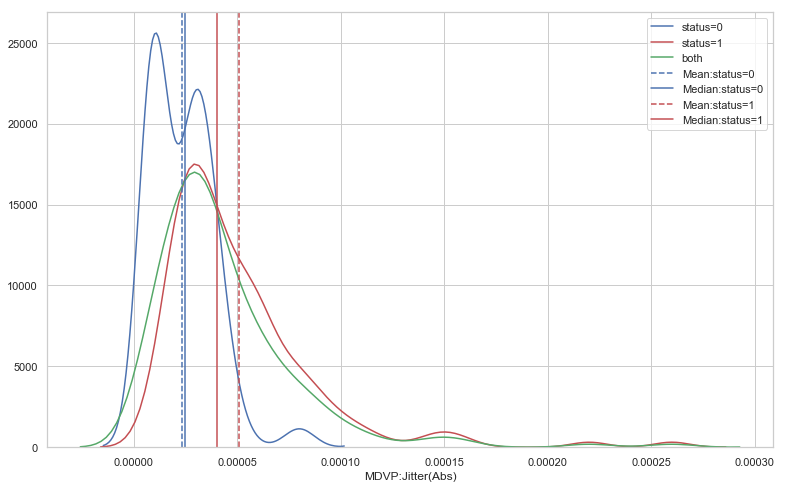

In [34]:
plt.figure(figsize=(13,8))
ax=sns.distplot( status_0['MDVP:Jitter(Abs)'], hist=False, color='b', label='status=0')
ax=sns.distplot( status_1['MDVP:Jitter(Abs)'], hist=False, color='r', label='status=1')
ax=sns.distplot( df['MDVP:Jitter(Abs)'], hist=False, color='g', label='both')
ax.axvline(status_0['MDVP:Jitter(Abs)'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['MDVP:Jitter(Abs)'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['MDVP:Jitter(Abs)'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['MDVP:Jitter(Abs)'].median(), color='r', linestyle='-', label='Median:status=1')
plt.legend(loc='upper right')
plt.show()

In [35]:
status_0['MDVP:Jitter(Abs)'].skew(), status_1['MDVP:Jitter(Abs)'].skew(), df['MDVP:Jitter(Abs)'].skew()

(1.2035082315190633, 2.554054663844502, 2.6490714165257274)

In [36]:
status_0['MDVP:Jitter(Abs)'].kurtosis(), status_1['MDVP:Jitter(Abs)'].kurtosis(), df['MDVP:Jitter(Abs)'].kurtosis()

(2.6354731415288413, 9.657518966591816, 10.869042517763667)

##### Observations on MDVP jitter (Abs) -
* People with PD have high Jitter units than people without PD
* People with PD have many outliers, indicating that Jitter units can be excessively high among PD patients.

#### RPDE

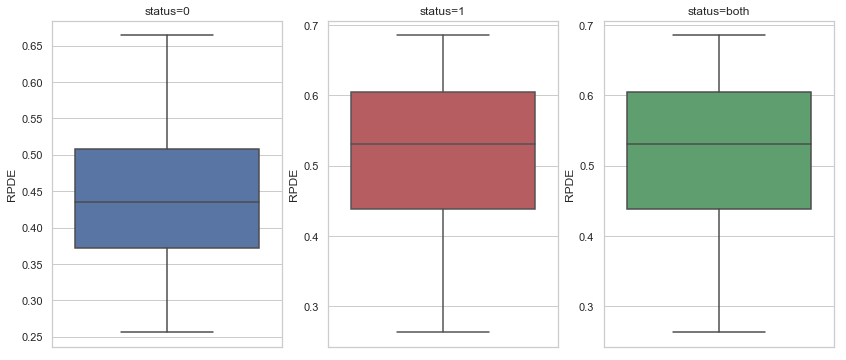

In [37]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(14,6))
sns.boxplot('RPDE', data=status_0, ax=ax0, orient="v", color='b')
sns.boxplot('RPDE', data=status_1, ax=ax1, orient="v", color='r')
sns.boxplot('RPDE', data=status_1, ax=ax2, orient="v", color='g')
ax0.set_title('status=0')
ax1.set_title('status=1')
ax2.set_title('status=both')
plt.show()

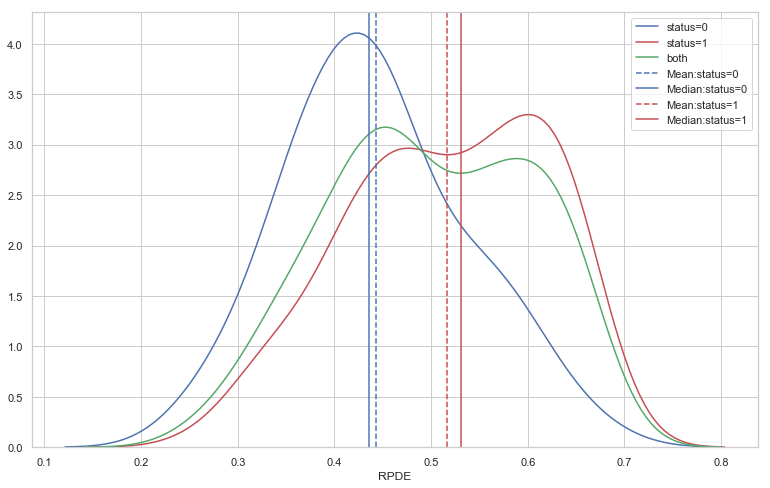

In [38]:
plt.figure(figsize=(13,8))
ax=sns.distplot( status_0['RPDE'], hist=False, color='b', label='status=0')
ax=sns.distplot( status_1['RPDE'], hist=False, color='r', label='status=1')
ax=sns.distplot( df['RPDE'], hist=False, color='g', label='both')
ax.axvline(status_0['RPDE'].mean(), color='b', linestyle='--', label='Mean:status=0')
ax.axvline(status_0['RPDE'].median(), color='b', linestyle='-', label='Median:status=0')
ax.axvline(status_1['RPDE'].mean(), color='r', linestyle='--', label='Mean:status=1')
ax.axvline(status_1['RPDE'].median(), color='r', linestyle='-', label='Median:status=1')
plt.legend(loc='upper right')
plt.show()

In [39]:
status_0['RPDE'].skew(), status_1['RPDE'].skew(), df['RPDE'].skew()

(0.3114385965198886, -0.33028862350073196, -0.14340241379821705)

In [40]:
status_0['RPDE'].kurtosis(), status_1['RPDE'].kurtosis(), df['RPDE'].kurtosis()

(-0.267557277574499, -0.8249206102733107, -0.9217809777573227)

##### Observations on RPDE -
* People with PD have high Jitter Percentage than people without PD
* People with PD have many outliers, indicating that Jitter Percentage can be excessively high among PD patients.

In [41]:
 df.corr()[(df.corr() > 0.4) | (df.corr() < -0.4)]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.446013,-0.413738,NaN,NaN,NaN
MDVP:Fhi(Hz),0.400985,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDVP:Flo(Hz),0.596546,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.400143,NaN,NaN,NaN,NaN,NaN
MDVP:Jitter(%),NaN,NaN,NaN,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,NaN,NaN,NaN,0.693577,NaN,0.433434,0.721543
MDVP:Jitter(Abs),NaN,NaN,NaN,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,NaN,0.441839,NaN,0.735779,NaN,NaN,0.748162
MDVP:RAP,NaN,NaN,NaN,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,NaN,NaN,NaN,0.648328,NaN,0.426605,0.670999
MDVP:PPQ,NaN,NaN,NaN,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,NaN,NaN,NaN,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,NaN,NaN,NaN,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,NaN,NaN,NaN,0.648328,NaN,0.426556,0.671005
MDVP:Shimmer,NaN,NaN,NaN,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,NaN,0.447424,NaN,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),NaN,NaN,NaN,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,NaN,0.410684,NaN,0.652547,0.454314,0.512233,0.695058


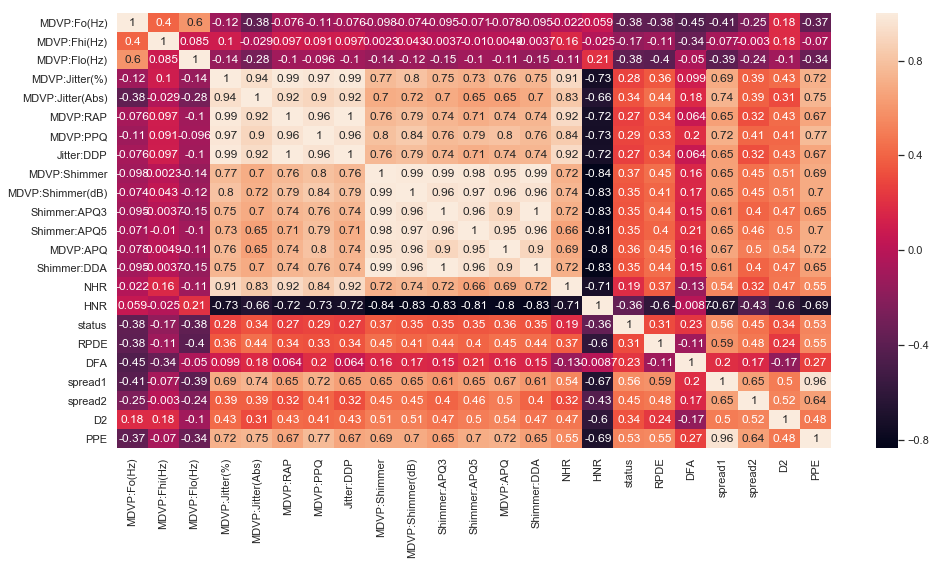

In [42]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True)

1) All the given measures of 'Jitter'( MDMDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP) are highly correlated. Hence, we can represent presence of Jitter, during model building, using just one of them. Since, __MDVP:Jitter(Abs)__ has highest correlation with our target variable (status); we will use only __MDVP:Jitter(Abs)__ for model building.

2) All the given measures of 'Shimmer'( MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA) are highly correlated. Hence, we can represent presence of Shimmer, during model building, using just one of them. Since, __MDVP:Shimmer__ has highest correlation with our target variable (status); we will use only __MDVP:Shimmer__ for model building.

3) Since NHR and HNR are highly correlated with, and so represented by Shimmer and Jitter, we will not use them for model building.


* Features to be used for prediction:

    1) MDVP:Fo(Hz)

    2) MDVP:Fhi(Hz)
    
    3) MDVP:Flo(Hz)
    
    4) MDVP:Jitter(Abs)
    
    5) MDVP:Shimmer
    
    6) RPDE
    
    7) DFA	
    
    8) spread1	
    
    9) spread2	
    
    10) D2	
    
    11) PPE

In [43]:
df['just_name'] = df['name'].apply(lambda a : a[:-2])
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE,just_name
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,phon_R01_S01
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,phon_R01_S01
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,phon_R01_S01
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,phon_R01_S01
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,phon_R01_S01


In [44]:
# Checking that each Patients' Status does not have discrepancy across their recordings.
pd.crosstab(index=df['just_name'], columns=df['status'])

status,0,1
just_name,,
phon_R01_S01,0,6
phon_R01_S02,0,6
phon_R01_S04,0,6
phon_R01_S05,0,6
phon_R01_S06,0,6
phon_R01_S07,6,0
phon_R01_S08,0,6
phon_R01_S10,6,0
phon_R01_S13,6,0


#### Some common functions

In [45]:
def showTree(model, dot_file, png_file, features, class_names, title):

    dot_data = export_graphviz(model, out_file=dot_file, 
                                    feature_names=features,
                                    class_names=class_names,
                                    filled=True, rounded=True,
                                    special_characters=True, 
                                    leaves_parallel=True, 
                                    node_ids=True)

    #These works only when out_file=None
    #graph = graphviz.Source(dot_data)
    #graph

    #To convert .dot to .png
    from subprocess import call
    call(['dot', '-Tpng', dot_file, '-o', png_file, '-Gdpi=600'])

    plt.figure(figsize = (14, 10))
    plt.imshow(plt.imread(png_file))
    plt.axis('off');
    plt.title(title);
    plt.show();

In [46]:
def saveRFTree(model, dot_file, png_file, features, class_names, title):

    estimator = model.estimators_[5]

    export_graphviz(estimator, out_file = dot_file, 
                    feature_names = features,
                    class_names = class_names,
                    rounded = True, 
                    proportion = False, 
                    precision = 2, 
                    filled = True,
                    leaves_parallel=True, 
                    node_ids=True)

    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    call(['dot', '-Tpng', dot_file, '-o', png_file, '-Gdpi=600'])

    # Display in jupyter notebook


In [47]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

def model_scores(model_name, y_test, y_pred):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

def model_scores_cross_validation(model_name, d):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [d['test_accuracy'].mean(), 
                          d['test_recall'].mean(),
                          d['test_precision'].mean(),
                          d['test_f1'].mean()]
    return result

In [48]:
from collections import Counter

def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: round(float(majority)/float(count), 2) for cls, count in counter.items()}

### 4. Split the dataset into training and test set min the ratio of 70:30 (Training:Test).
### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data.


In [49]:
random_state = 221271751
X = df.drop(['name', 'just_name', 'status'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

class_weights = get_class_weights(y_train)

DT_results = pd.DataFrame()

for min_depth in np.arange(1,6): 
    for min_leaf in np.arange(1,6):
        title_reg = "DT-({0},{1})".format(min_depth, min_leaf)
        print("\n title", title_reg)
        print()
        dte_model_reg = DecisionTreeClassifier(criterion = 'entropy', class_weight=class_weights, max_depth = min_depth, min_samples_leaf=min_leaf, random_state=random_state)
        dte_model_reg.fit(X_train, y_train)
        y_pred_reg = dte_model_reg.predict(X_test)

        dte_result_reg = model_scores(title_reg, y_test, y_pred_reg)
        print(dte_result_reg)
        
        DT_results = pd.concat([DT_results, dte_result_reg], axis=1, sort=False)


 title DT-(1,1)

           DT-(1,1)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(1,2)

           DT-(1,2)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(1,3)

           DT-(1,3)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(1,4)

           DT-(1,4)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(1,5)

           DT-(1,5)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(2,1)

           DT-(2,1)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(2,2)

           DT-(2,2)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(2,3)

           DT-(2,3)
Accuracy   0.677966
Recall     0.619048
Precision  0.896552
F1 Score   0.732394

 title DT-(2,4)

           DT-(2,4)
Accuracy   0.67796

In [50]:
DT_results

,"DT-(1,1)","DT-(1,2)","DT-(1,3)","DT-(1,4)","DT-(1,5)","DT-(2,1)","DT-(2,2)","DT-(2,3)","DT-(2,4)","DT-(2,5)",...,"DT-(4,1)","DT-(4,2)","DT-(4,3)","DT-(4,4)","DT-(4,5)","DT-(5,1)","DT-(5,2)","DT-(5,3)","DT-(5,4)","DT-(5,5)"
Accuracy,0.677966,0.677966,0.677966,0.677966,0.677966,0.677966,0.677966,0.677966,0.677966,0.677966,...,0.796610,0.796610,0.796610,0.796610,0.796610,0.813559,0.813559,0.796610,0.796610,0.796610
Recall,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,0.619048,...,0.833333,0.833333,0.833333,0.833333,0.833333,0.857143,0.857143,0.833333,0.833333,0.833333
Precision,0.896552,0.896552,0.896552,0.896552,0.896552,0.896552,0.896552,0.896552,0.896552,0.896552,...,0.875000,0.875000,0.875000,0.875000,0.875000,0.878049,0.878049,0.875000,0.875000,0.875000
F1 Score,0.732394,0.732394,0.732394,0.732394,0.732394,0.732394,0.732394,0.732394,0.732394,0.732394,...,0.853659,0.853659,0.853659,0.853659,0.853659,0.867470,0.867470,0.853659,0.853659,0.853659


In [51]:
random_state = 221271751
X = df.drop(['name', 'just_name', 'status'], axis=1)
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

class_weights = get_class_weights(y_train)

title = "DT - Fully Grown"
print("\n", title)
dte_model = DecisionTreeClassifier(criterion='entropy', random_state=random_state)

dte_model.fit(X_train, y_train)
y_pred = dte_model.predict(X_test)

dte_result = model_scores(title, y_test, y_pred)
print()
print(confusion_matrix(y_test, y_pred))

title_reg = "DT-(6,6)"
print("\n", title_reg)

dte_model_reg = DecisionTreeClassifier(criterion = 'entropy', class_weight=class_weights, max_depth = 6, min_samples_leaf=6, random_state=random_state)
dte_model_reg.fit(X_train, y_train)
y_pred_reg = dte_model_reg.predict(X_test)

dte_result_reg = model_scores(title_reg, y_test, y_pred_reg)
print()
print(confusion_matrix(y_test, y_pred_reg))


title_reg1 = "DT-(6,4)"
print("\n", title_reg1)

dte_model_reg1 = DecisionTreeClassifier(criterion = 'entropy', class_weight=class_weights, max_depth = 6, min_samples_leaf=4, random_state=random_state)
dte_model_reg1.fit(X_train, y_train)
y_pred_reg1 = dte_model_reg1.predict(X_test)

dte_result_reg1 = model_scores(title_reg1, y_test, y_pred_reg1)
print()
print(confusion_matrix(y_test, y_pred_reg1))

title_reg2 = "DT-(5,5)"
print("\n", title_reg2)

dte_model_reg2 = DecisionTreeClassifier(criterion = 'entropy', class_weight=class_weights, max_depth = 5, min_samples_leaf=5, random_state=random_state)
dte_model_reg2.fit(X_train, y_train)
y_pred_reg2 = dte_model_reg2.predict(X_test)

dte_result_reg2 = model_scores(title_reg2, y_test, y_pred_reg2)
print()
print(confusion_matrix(y_test, y_pred_reg2))


title_reg3 = "DT-(4,4)"
print("\n", title_reg3)

dte_model_reg3 = DecisionTreeClassifier(criterion = 'entropy', class_weight=class_weights, max_depth = 4, min_samples_leaf=4, random_state=random_state)
dte_model_reg3.fit(X_train, y_train)
y_pred_reg3 = dte_model_reg3.predict(X_test)

dte_result_reg3 = model_scores(title_reg3, y_test, y_pred_reg3)
print()
print(confusion_matrix(y_test, y_pred_reg2))

print("------------------------------------------------------------------------------------------------------")


 DT - Fully Grown

[[10  7]
 [ 5 37]]

 DT-(6,6)

[[12  5]
 [ 5 37]]

 DT-(6,4)

[[12  5]
 [ 5 37]]

 DT-(5,5)

[[12  5]
 [ 7 35]]

 DT-(4,4)

[[12  5]
 [ 7 35]]
------------------------------------------------------------------------------------------------------


In [52]:
DT_results = pd.DataFrame()
DT_results = pd.concat([dte_result, dte_result_reg, dte_result_reg1, dte_result_reg2, dte_result_reg3], axis=1, sort=False)
DT_results

,DT - Fully Grown,"DT-(6,6)","DT-(6,4)","DT-(5,5)","DT-(4,4)"
Accuracy,0.796610,0.830508,0.830508,0.796610,0.796610
Recall,0.880952,0.880952,0.880952,0.833333,0.833333
Precision,0.840909,0.880952,0.880952,0.875000,0.875000
F1 Score,0.860465,0.880952,0.880952,0.853659,0.853659


In [53]:
class_names = ['Non PD', 'PD']

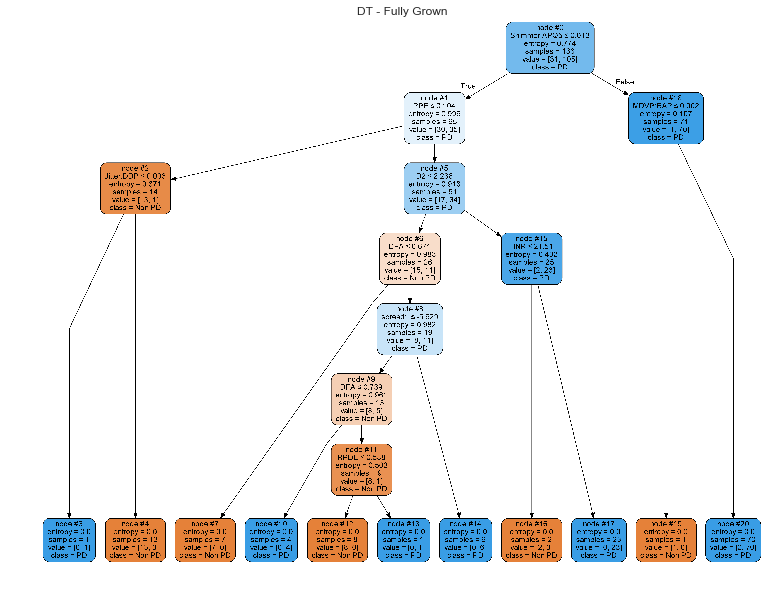

In [54]:
features=X.columns

dot_file = 'dte_PD.dot'
png_file = 'dte_PD.png'
model = dte_model
title = title
showTree(model, dot_file, png_file, features, class_names, title)

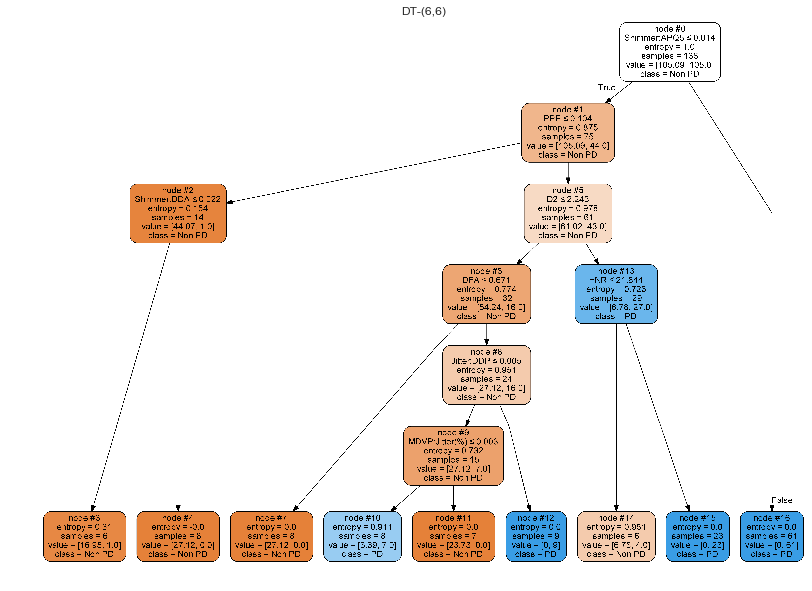

In [55]:
dot_file = 'dte_PD_reg.dot'
png_file = 'dte_PD_reg.png'
model = dte_model_reg
title = title_reg
showTree(model, dot_file, png_file, features, class_names, title)

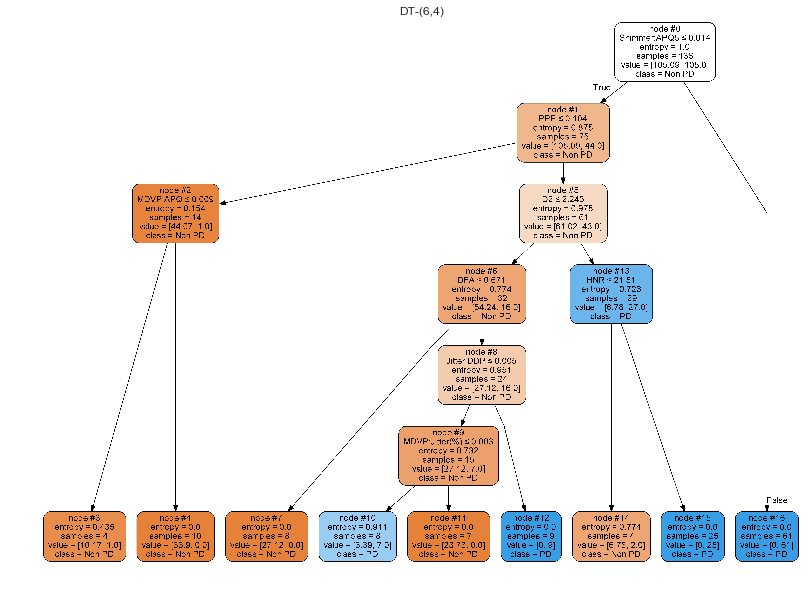

In [56]:
dot_file = 'dte_PD_reg1.dot'
png_file = 'dte_PD_reg1.png'
model = dte_model_reg1
title = title_reg1
showTree(model, dot_file, png_file, features, class_names, title)

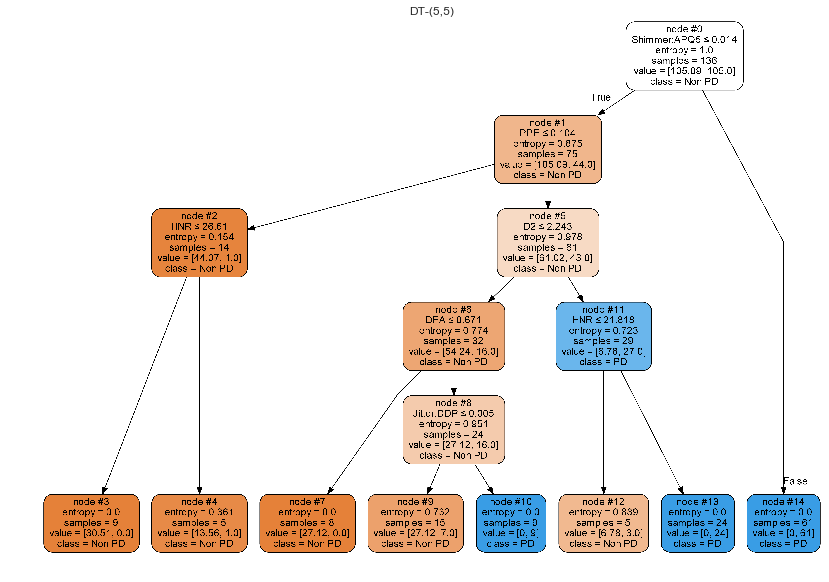

In [57]:
dot_file = 'dte_PD_reg2.dot'
png_file = 'dte_PD_reg2.png'
model = dte_model_reg2
title = title_reg2
showTree(model, dot_file, png_file, features, class_names, title)

#### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)



In [58]:
estimator_counts = np.arange(1, 125, 2)
scores = pd.DataFrame(index=estimator_counts)
for cnt in estimator_counts:
    model_opt = RandomForestClassifier(criterion='entropy',n_estimators = cnt, random_state=random_state, class_weight=class_weights, max_depth = 3, min_samples_leaf=4)
    model_opt.fit(X_train, y_train)
    y_pred_opt = model_opt.predict(X_test)
    scores.at[cnt, 'F1 Score'] = f1_score(y_test, y_pred_opt)
    
optimum_estimator = scores['F1 Score'].idxmax()
max_score = scores['F1 Score'].max()

optimum_estimator, max_score

(3, 0.9411764705882352)


Optimal number of trees that gives the best result is : 3, with F1-score 0.9411764705882352


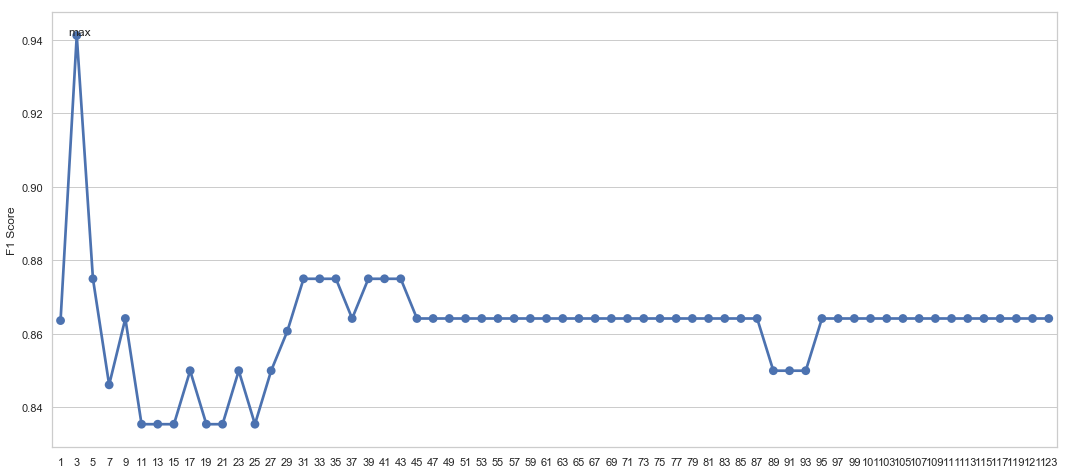

In [59]:
print("\nOptimal number of trees that gives the best result is : {0}, with F1-score {1}".format(optimum_estimator, max_score ))

plt.figure(figsize=(18, 8))
plt.annotate('max', xy=((optimum_estimator/2)-1, max_score))
sns.pointplot(estimator_counts, scores['F1 Score'])
plt.show()

In [60]:
model_rf = RandomForestClassifier(criterion='entropy',n_estimators = cnt, random_state=random_state, class_weight=class_weights, max_depth = 3, min_samples_leaf=4 )
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
result_rf = model_scores('Random Forest', y_test, y_pred_rf)
result_rf

,Random Forest
Accuracy,0.813559
Recall,0.833333
Precision,0.897436
F1 Score,0.864198


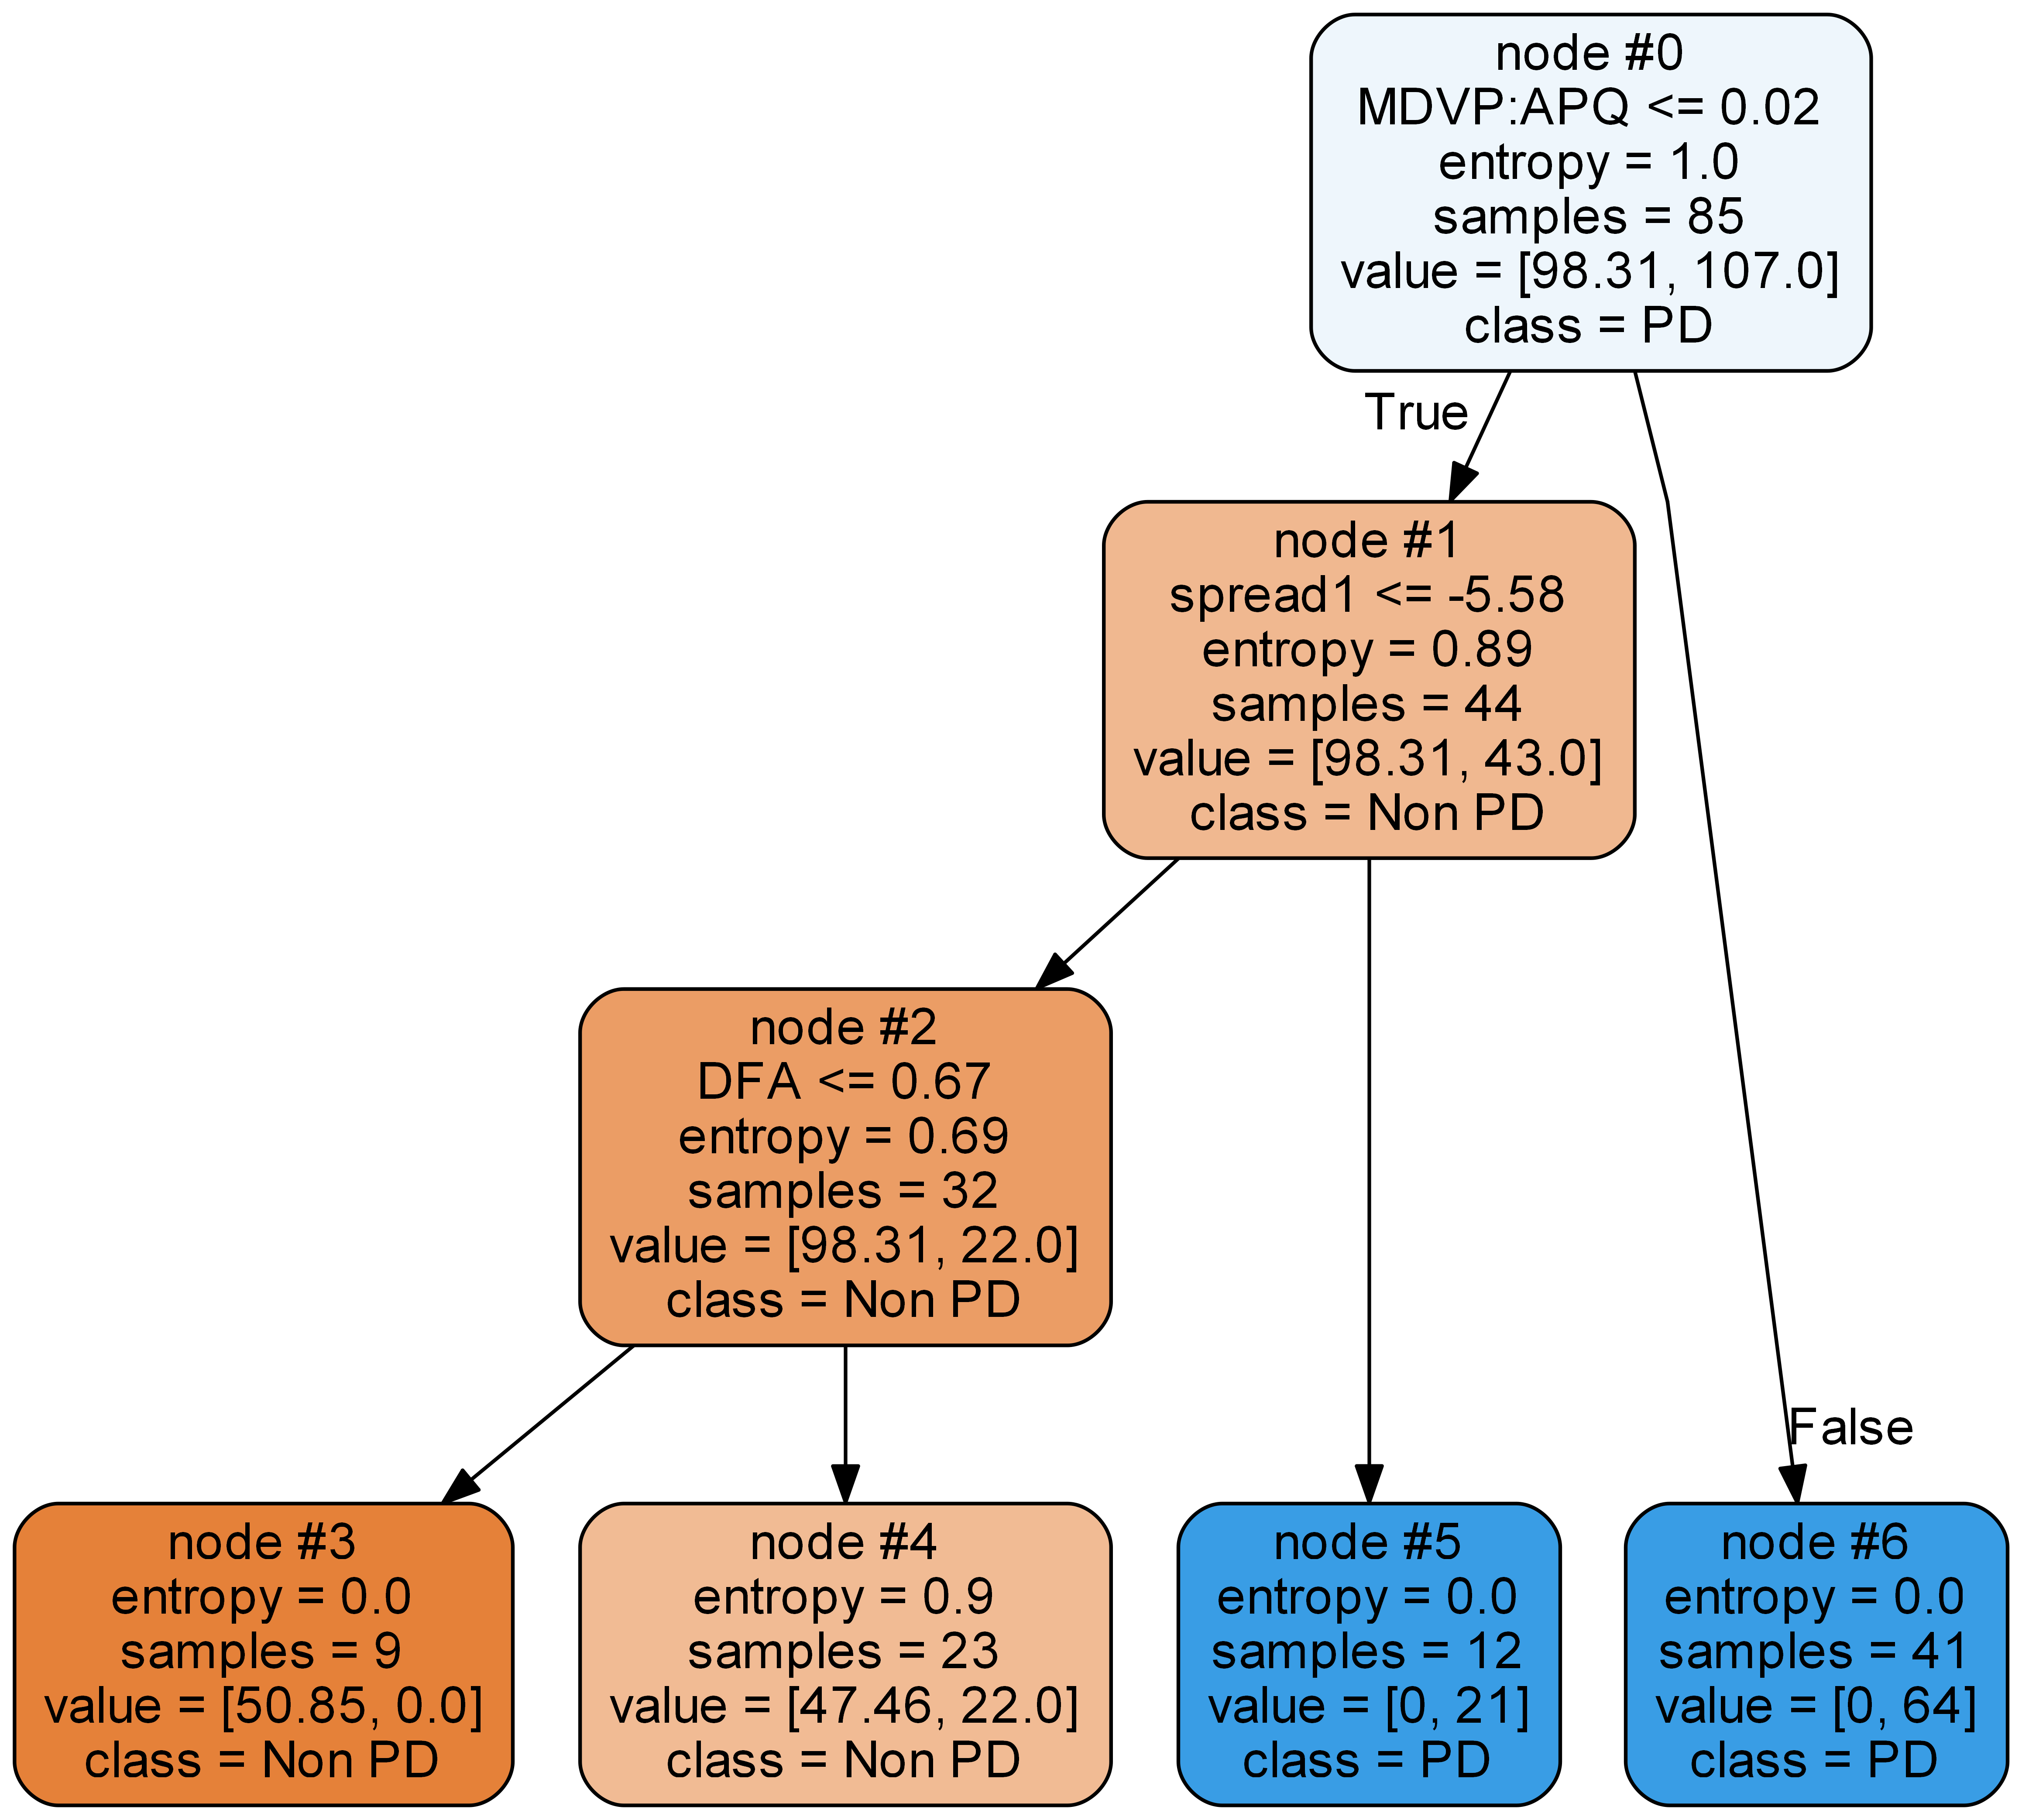

In [61]:
class_names = ['Non PD', 'PD']
features = X.columns

dot_file = 'rf_PD.dot'
png_file = 'rf_PD.png'
model = model_rf
title = 'Random Forest with optimum number of Trees'

saveRFTree(model, dot_file, png_file, features, class_names, title)

#from IPython.display import Image
Image(filename = png_file)

In [62]:
final_result = pd.DataFrame()
final_result = pd.concat([result_rf, DT_results], axis=1, sort=False)
final_result

,Random Forest,DT - Fully Grown,"DT-(6,6)","DT-(6,4)","DT-(5,5)","DT-(4,4)"
Accuracy,0.813559,0.796610,0.830508,0.830508,0.796610,0.796610
Recall,0.833333,0.880952,0.880952,0.880952,0.833333,0.833333
Precision,0.897436,0.840909,0.880952,0.880952,0.875000,0.875000
F1 Score,0.864198,0.860465,0.880952,0.880952,0.853659,0.853659


In [65]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [70]:
from sklearn.utils import resample
df1 = pd.DataFrame({'age':    [ 3,  29, 27, 54], 
                   'height': [94, 170, 140, 110],
                   'weight': [31, 115, 110, 112]
                  })
#print(df.values)

train = [[3, 94, 32], [3, 94, 33]]

for x in df1.values:
    #print(x)
    print(x.tolist())

print(X.shape)

terain = resample(X.values, n_samples=100, replace=True)
teest = np.array([x for x in X.values if x.tolist() not in terain.tolist()])

print("Training Data")
print(terain.shape)    

print("Testing Data")
print(teest.shape)    

#df

[3, 94, 31]
[29, 170, 115]
[27, 140, 110]
[54, 110, 112]
(195, 22)
Training Data
(100, 22)
Testing Data
(117, 22)
